In [76]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

### Paths

In [77]:
#File paths
main_path_energy ='../data_base/paths_energy/'
main_path_total_energy = '../data_base/paths_totals/'
#main_path_turns = "/home/sebastian/Desktop/"

energy_path11_pd = pd.read_csv(main_path_energy + 'feat_pathv11_TM.csv')
energy_path12_pd = pd.read_csv(main_path_energy + 'feat_pathv12_TM.csv')
energy_path13_pd = pd.read_csv(main_path_energy + 'feat_pathv13_TM.csv')

energy_path_list = [energy_path11_pd,energy_path12_pd,energy_path13_pd]
complete_energy_pd = pd.concat(energy_path_list)

total_path11_pd = pd.read_csv(main_path_total_energy + 'totalF_pathv11.csv')
total_path12_pd = pd.read_csv(main_path_total_energy + 'totalF_pathv12.csv')
total_path13_pd = pd.read_csv(main_path_total_energy + 'totalF_pathv13.csv')

total_path_list = [total_path11_pd,total_path12_pd,total_path13_pd]
complete_total_pd = pd.concat(total_path_list)

### Data split and preprocessing - complete_energy_pd - All data

this data comes from the folder "paths_energy"

In [78]:
X = complete_energy_pd.drop(columns=["missing_points","path_num","sim_drone_time","Energy","sim_point_dist","sim_Xdist","sim_Ydist","avg_error_target_dist","avg_energy"],axis=1)
y = complete_energy_pd["Energy"].to_numpy()
print(X.head())
X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f'Train size/Test size {len(x_train),len(x_test)}')

   teo_point_time  teo_point_dist  teo_Xdist  teo_Ydist  teo_point_vel  \
0             190       14.142136       10.0       10.0       0.074432   
1             233       12.727922        9.0        9.0       0.054626   
2             248       23.323808       20.0       12.0       0.094048   
3             157        8.000000        0.0        8.0       0.050955   
4             236       19.235384        3.0       19.0       0.081506   

   teo_Xvel  teo_Yvel  avg_tankMass  
0  0.052632  0.052632      7.695402  
1  0.038627  0.038627      3.188070  
2  0.080645  0.048387     10.000989  
3  0.043694  0.026216     10.000989  
4  0.012712  0.080508      7.396412  
Train size/Test size (3740, 935)


#### Fit Linear regression

In [79]:
linearRe = LinearRegression()
model = linearRe.fit(x_train,y_train)

#### Accuracy

In [80]:
start_time = time.time()
predict = linearRe.predict(x_test)

r2 = r2_score(y_test,predict)
rmse = mean_squared_error(y_test,predict,squared=False)


print(f'r2 score: {r2}')
print(f'RMSE score: {rmse}')
print('Execution time = ' + str(time.time() - start_time))

r2 score: 0.6440170601660564
RMSE score: 1078181.396881226
Execution time = 0.0032401084899902344


In [81]:
linearRe.coef_

array([1150316.61559285,   54318.14697284,  107111.51515724,
        106512.10654803,  174044.18931457, -100211.6750686 ,
        -95867.83211963, -115805.86296469])

### Data split and preprocessing - complete_energy_pd - with eps

In [82]:
eps = 5
complete_energy_pd = complete_energy_pd[(complete_energy_pd['sim_point_dist']-complete_energy_pd['teo_point_dist']) < eps]
print(f'new shape of complete_energy_pd = {complete_energy_pd.shape}')

new shape of complete_energy_pd = (3957, 17)


In [83]:
X = complete_energy_pd.drop(columns=["missing_points","path_num","sim_drone_time","Energy","sim_point_dist","sim_Xdist","sim_Ydist","avg_error_target_dist","avg_energy"],axis=1)
y = complete_energy_pd["Energy"].to_numpy()

X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

scaler2 = StandardScaler()

x_train = scaler2.fit_transform(x_train)
x_test = scaler2.transform(x_test)

print(f'Train size/Test size {len(x_train),len(x_test)}')

Train size/Test size (3165, 792)


#### Fit Linear regression

In [84]:
linearRe2 = LinearRegression()
model = linearRe2.fit(x_train,y_train)

#### Accuracy

In [85]:
start_time = time.time()
predict = linearRe2.predict(x_test)

r2 = r2_score(y_test,predict)
rmse = mean_squared_error(y_test,predict,squared=False)


print(f'r2 score: {r2}')
print(f'RMSE score: {rmse}')
print('Execution time = ' + str(time.time() - start_time))

r2 score: 0.6437733964840886
RMSE score: 901522.9024644629
Execution time = 0.0013463497161865234


In [86]:
# save the model to disk
filename = 'linearRe2.sav'
#pickle.dump(linearRe2, open(filename, 'wb'))

[1064481.00128502   80654.7255546    95687.18415393  125143.57310016
  -54984.98673194    2257.91403508   -2096.7373246  -120564.39337542]


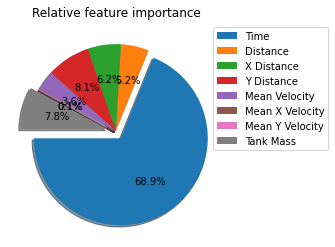

In [91]:
print(linearRe2.coef_)
labels = 'Time', 'Distance', 'X Distance', 'Y Distance','Mean Velocity', 'Mean X Velocity', 'Mean Y Velocity', 'Tank Mass'
sizes = abs(linearRe2.coef_)
explode = (0.1, 0, 0, 0,0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(sizes,explode=explode, autopct='%1.1f%%',shadow=True, startangle=180)
plt.legend(labels,loc="upper right", bbox_to_anchor=(1, 0., 0.5, 1))
plt.title('Relative feature importance')
#plt.savefig('Pie Feature importance 2')

### Data split and preprocessing - complete_total_pd

this data comes from "path_totals" folder

In [88]:
X = complete_total_pd.drop(columns=["path_num","energy"],axis=1)
y = complete_total_pd["energy"].to_numpy()

X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f'Train size/Test size {len(x_train),len(x_test)}')

Train size/Test size (627, 157)


#### Fit Linear regression

In [89]:
linearRe3 = LinearRegression()
model = linearRe3.fit(x_train,y_train)

#### Accuracy

In [90]:
start_time = time.time()
predict = linearRe3.predict(x_test)

r2 = r2_score(y_test,predict)
rmse = mean_squared_error(y_test,predict,squared=False)


print(f'r2 score: {r2}')
print(f'RMSE score: {rmse}')
print('Execution time = ' + str(time.time() - start_time))

r2 score: 0.0142368425447994
RMSE score: 5215055.013972033
Execution time = 0.0014760494232177734
